In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(["day","month","year"],axis = 1, inplace = True)

In [6]:
#Encoding
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [7]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [8]:
#dependent and independent features
X = df.drop(["FWI"], axis = 1) #independent
y = df["FWI"]  #dependent

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 34)

In [27]:
#check for multicollinearity
corr = X_train.corr()

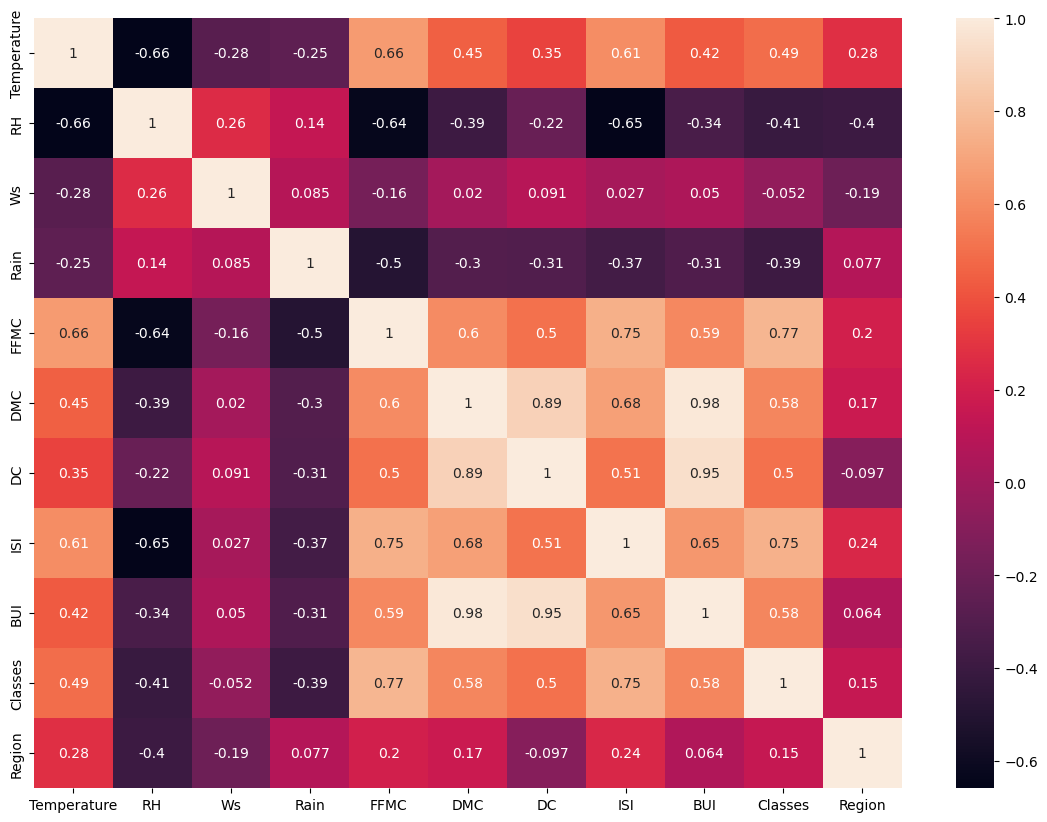

In [29]:
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot = True)
plt.show()

In [30]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train,0.85)

In [34]:
#drop these features
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

In [35]:
#standardization
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Box plots to understand the effects of Standard Scaler

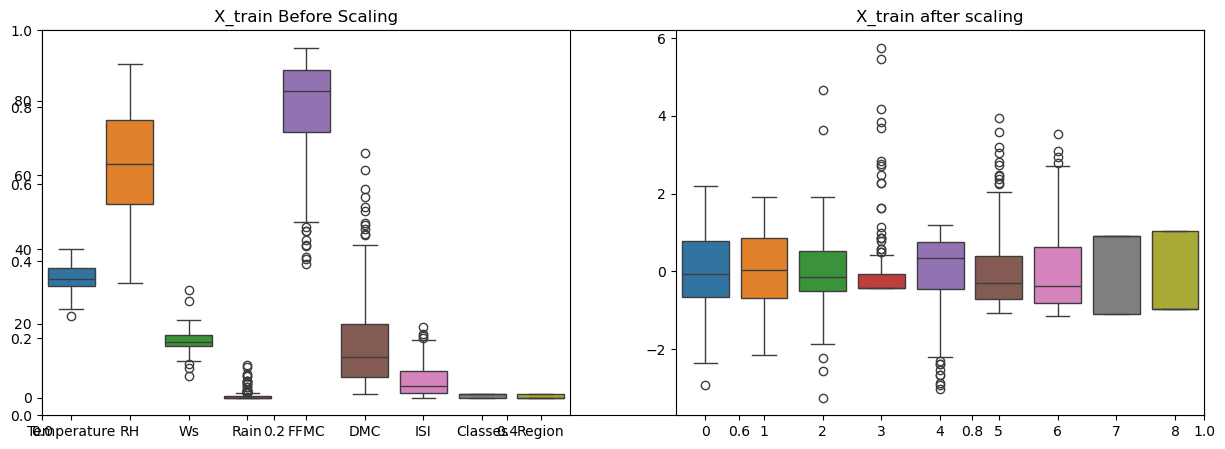

In [59]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")
plt.show()

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [64]:
linreg = LinearRegression()

In [66]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

0.7433926086770383
0.9792741570653651


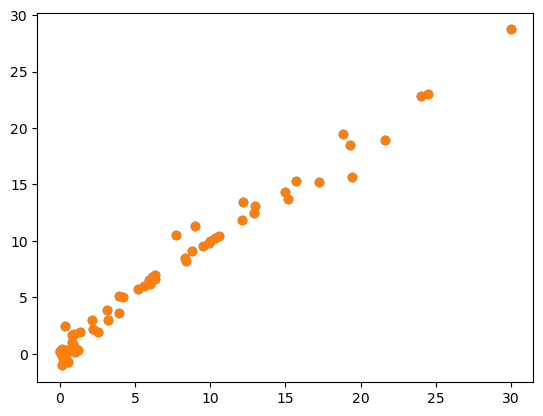

In [71]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2_score1 = r2_score(y_test,y_pred)
print(r2_score1)
plt.scatter(y_test,y_pred)
plt.show()

# Lasso Regression

1.1986159476339322
0.9483405807978365


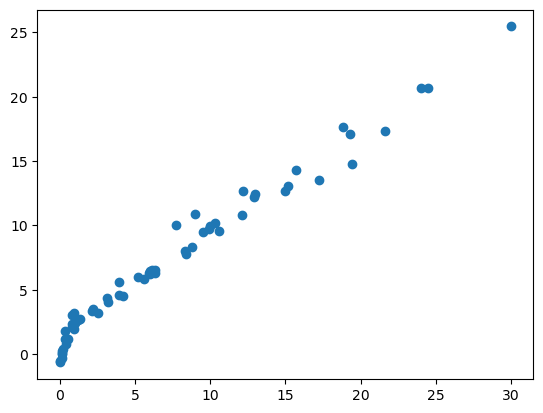

In [73]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2_score1 = r2_score(y_test,y_pred)
print(r2_score1)
plt.scatter(y_test,y_pred)
plt.show()

# Ridge Regression

0.7555624552476633
0.9784788997577422


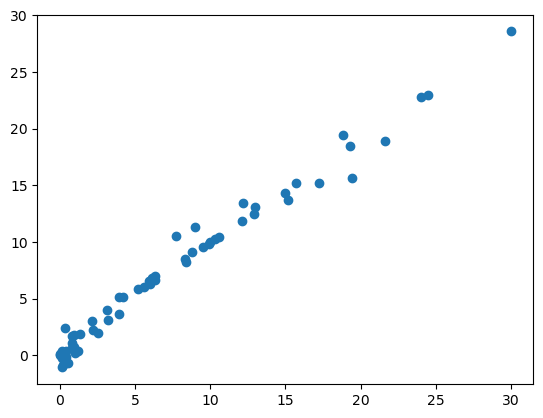

In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2_score1 = r2_score(y_test,y_pred)
print(r2_score1)
plt.scatter(y_test,y_pred)
plt.show()

# ElasticNet

1.8579584325217633
0.8800221677901573


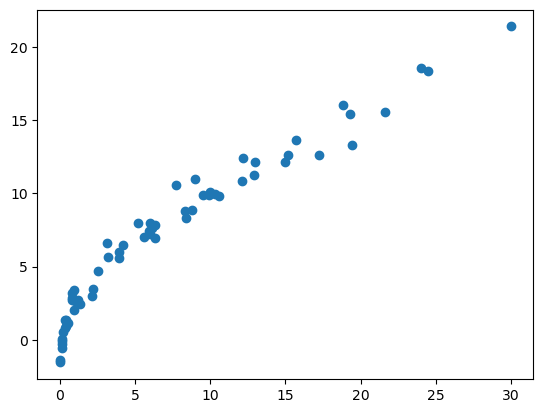

In [75]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = enet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2_score1 = r2_score(y_test,y_pred)
print(r2_score1)
plt.scatter(y_test,y_pred)
plt.show()

# Cross-Validation Lasso

In [77]:
from sklearn.linear_model import LassoCV

In [89]:
lassocv = LassoCV(cv= 5)

In [90]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [91]:
lassocv.predict(X_test_scaled)

array([ 0.12812425,  1.97842302,  1.0650358 ,  5.1627997 , 13.44334176,
        0.18022907, 14.27540953, -0.27856045,  5.98548914, 22.8225707 ,
        0.3690146 , 12.54577287,  0.29674128,  6.8732403 ,  5.69096209,
        6.80160169,  8.4994213 ,  3.63582012, -0.85910841, 10.02938194,
        2.32867811,  6.71496819,  9.54127152,  1.66617369, 10.41249671,
        0.32985961,  2.98541249, 23.00752621,  0.79353274,  4.94597174,
        3.84761355,  2.01121603, 19.43607826, 10.30314209,  3.0588308 ,
       18.94305474,  0.63931867, -0.65790775,  6.44363043,  0.09014421,
       15.73192968, 10.4710385 , -1.06274167, 18.50740502, 11.35360357,
       11.87393642,  1.8016736 ,  8.22867886,  6.51364842, 13.75854106,
        9.06040136, 15.23518253,  6.15554425,  2.3536801 , 13.12786959,
        9.79114772, 28.68383199,  0.05025009, 15.25190606, -0.15594667,
        0.50587205])

In [92]:
lassocv.alphas_

array([6.80235674, 6.34390066, 5.91634299, 5.51760127, 5.14573342,
       4.79892821, 4.47549651, 4.17386302, 3.89255862, 3.6302132 ,
       3.38554898, 3.15737431, 2.94457785, 2.74612316, 2.56104365,
       2.38843788, 2.22746516, 2.07734146, 1.9373356 , 1.80676566,
       1.6849957 , 1.57143263, 1.46552333, 1.36675197, 1.27463746,
       1.18873116, 1.10861466, 1.03389774, 0.96421649, 0.89923153,
       0.83862633, 0.78210572, 0.72939442, 0.68023567, 0.63439007,
       0.5916343 , 0.55176013, 0.51457334, 0.47989282, 0.44754965,
       0.4173863 , 0.38925586, 0.36302132, 0.3385549 , 0.31573743,
       0.29445778, 0.27461232, 0.25610436, 0.23884379, 0.22274652,
       0.20773415, 0.19373356, 0.18067657, 0.16849957, 0.15714326,
       0.14655233, 0.1366752 , 0.12746375, 0.11887312, 0.11086147,
       0.10338977, 0.09642165, 0.08992315, 0.08386263, 0.07821057,
       0.07293944, 0.06802357, 0.06343901, 0.05916343, 0.05517601,
       0.05145733, 0.04798928, 0.04475497, 0.04173863, 0.03892

In [93]:
y_pred_cv = lassocv.predict(X_test_scaled)

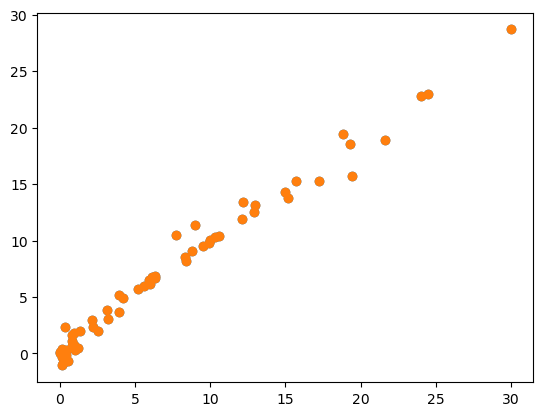

In [95]:
plt.scatter(y_test,y_pred_cv)
plt.show()

In [96]:
mae2 = mean_absolute_error(y_test,y_pred_cv)
r2_score2 = r2_score(y_test,y_pred_cv)
print(mae2)
print(r2_score2)

0.7277254673437816
0.979608689349916


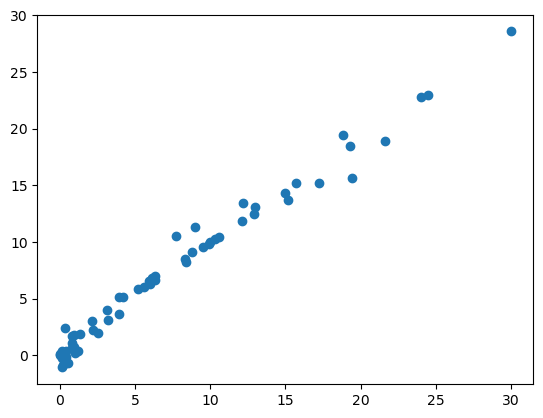

0.7555624552476633
0.9784788997577422


In [100]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred_r=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred_r)
plt.show()
mae3 = mean_absolute_error(y_test,y_pred_r)
r2_score4 = r2_score(y_test,y_pred_r)
print(mae3)
print(r2_score4)

In [101]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [102]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [104]:
from sklearn.linear_model import ElasticNetCV

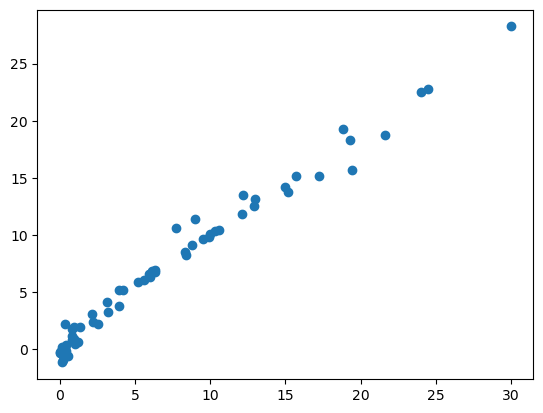

0.7769433211627262
0.9772861320221261


In [106]:
enetcv = ElasticNetCV(cv = 5)
enetcv.fit(X_train_scaled,y_train)
y_pred_e = enetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred_e)
plt.show()
mae5 = mean_absolute_error(y_test,y_pred_e)
r2_score5 = r2_score(y_test,y_pred_e)
print(mae5)
print(r2_score5)

In [107]:
#pickle
import pickle
pickle.dump(ridge,open("ridge.pkl","wb"))
pickle.dump(lasso,open("lasso.pkl","wb"))